In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
#matplotlib inline
production = pd.read_csv("time_series_15min_singleindex.csv",usecols=(lambda s: s.startswith('utc')|s.startswith('DE')),parse_dates=[0],index_col=0)
production.head(3)
production.tail(3)
production = production.loc[production.index.year == 2016,:]
production.head(3)
production.tail(3)
production.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35136 entries, 2016-01-01 00:00:00 to 2016-12-31 23:45:00
Data columns (total 37 columns):
DE_load_entsoe_transparency                     35136 non-null float64
DE_solar_capacity                               35136 non-null float64
DE_solar_generation_actual                      35136 non-null float64
DE_solar_profile                                35136 non-null float64
DE_wind_capacity                                35136 non-null float64
DE_wind_generation_actual                       35136 non-null float64
DE_wind_profile                                 35136 non-null float64
DE_wind_offshore_capacity                       35136 non-null float64
DE_wind_offshore_generation_actual              35136 non-null float64
DE_wind_offshore_profile                        35136 non-null float64
DE_wind_onshore_capacity                        35136 non-null float64
DE_wind_onshore_generation_actual               35136 non-null float64
DE_w

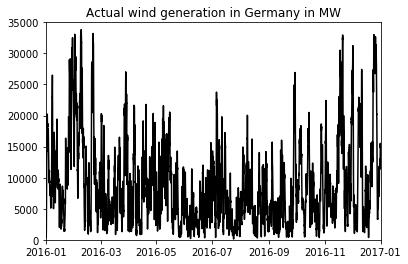

In [26]:
#create plot
plt.plot(production.index,production['DE_wind_generation_actual'],c='black')
plt.title('Actual wind generation in Germany in MW')
plt.xlim(pd.Timestamp('2016-01-01'),pd.Timestamp('2017-01-01'))
plt.ylim(0,35000)
plt.show()

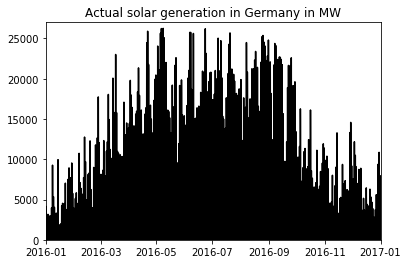

In [25]:
#create plot
plt.plot(production.index,production['DE_solar_generation_actual'], c='black')
plt.title('Actual solar generation in Germany in MW')
plt.xlim(pd.Timestamp('2016-01-01'),pd.Timestamp('2017-01-01'))
plt.ylim(0,27000)
plt.show()

In [31]:
production_wind_solar = production[[ 'DE_solar_generation_actual','DE_wind_generation_actual']]

In [35]:
weather = pd.read_csv("weather_data_GER_2016.csv", parse_dates=[0], index_col=0)
weather.head(3)
weather.tail(3)
weather.info()
weather.loc[weather.index == '2016-01-01 00:00:00', :]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2248704 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 14 columns):
cumulated hours    int64
lat                float64
lon                float64
v1                 float64
v2                 float64
v_50m              float64
h1                 int64
h2                 int64
z0                 float64
SWTDN              float64
SWGDN              float64
T                  float64
rho                float64
p                  float64
dtypes: float64(11), int64(3)
memory usage: 257.3 MB


,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01,0,47.5,6.250,0.85,1.77,3.69,2,10,0.163823,0.0,0.0,277.609924,1.226037,98194.710938
2016-01-01,0,47.5,6.875,0.94,1.94,3.79,3,11,0.286626,0.0,0.0,276.850159,1.205101,96186.710938
2016-01-01,0,47.5,7.500,0.84,1.68,2.82,2,10,0.109472,0.0,0.0,276.414612,1.200341,95874.710938
2016-01-01,0,47.5,8.125,0.74,1.56,2.51,2,10,0.066503,0.0,0.0,276.039612,1.202233,96050.710938
2016-01-01,0,47.5,8.750,0.76,1.49,2.37,2,10,0.051061,0.0,0.0,275.898987,1.201012,95842.710938
2016-01-01,0,47.5,9.375,0.75,1.27,1.83,2,10,0.082921,0.0,0.0,275.578674,1.181908,94178.710938
2016-01-01,0,47.5,10.000,0.88,1.59,2.32,4,12,0.398931,0.0,0.0,274.123596,1.146264,90998.710938
2016-01-01,0,47.5,10.625,0.81,1.38,1.93,6,14,0.813970,0.0,0.0,273.670471,1.117516,88518.710938


In [36]:
#Averaging over all the 'chuncks':
2248704/256

8784.0

In [37]:
weather_by_day = weather.groupby(weather.index).mean()
weather_by_day.head(24)


,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.000000,0.000000,275.296747,1.253185,99281.007812
2016-01-01 01:00:00,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.000000,0.000000,275.255473,1.253778,99288.492188
2016-01-01 02:00:00,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.000000,0.000000,275.217089,1.254304,99296.398438
2016-01-01 03:00:00,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.000000,0.000000,275.211715,1.254562,99306.695312
2016-01-01 04:00:00,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.000000,0.000000,275.193369,1.254733,99319.750000
2016-01-01 05:00:00,5.0,51.25,10.3125,2.207227,3.160312,4.445078,2.546875,10.546875,0.164153,0.000000,0.000000,275.184228,1.254969,99336.710938
2016-01-01 06:00:00,6.0,51.25,10.3125,2.099336,3.027148,4.291758,2.546875,10.546875,0.164116,0.029503,0.002406,275.151314,1.255247,99357.078125
2016-01-01 07:00:00,7.0,51.25,10.3125,2.001992,2.903750,4.116836,2.542969,10.542969,0.164068,32.701265,4.885147,275.175961,1.255487,99383.765625
2016-01-01 08:00:00,8.0,51.25,10.3125,2.061836,2.915977,3.855273,2.542969,10.542969,0.164031,167.523132,34.330536,275.612767,1.255295,99415.406250


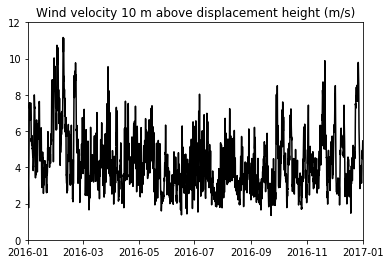

In [39]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['v2'],c='black')
plt.title('Wind velocity 10 m above displacement height (m/s)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 12)
plt.show()


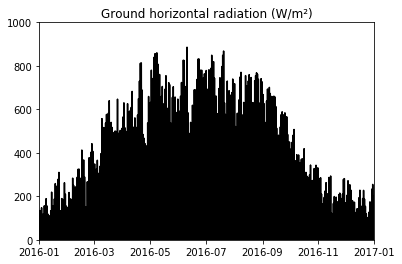

In [41]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['SWGDN'], c='black')
plt.title('Ground horizontal radiation (W/m²)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(0, 1000)
plt.show()


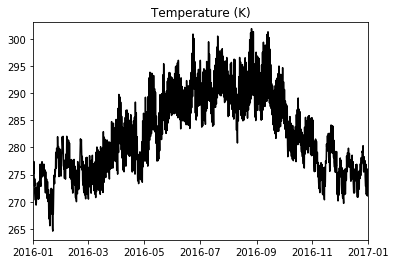

In [42]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['T'], c='black')
plt.title('Temperature (K)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(263, 303)
plt.show()


In [43]:
weather_by_day['T (C)'] = weather_by_day['T'] - 273.15

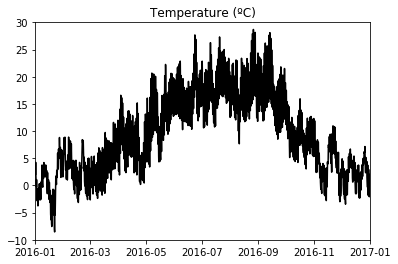

In [45]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['T (C)'], c='black')
plt.title('Temperature (ºC)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.ylim(-10, 30)
plt.show()


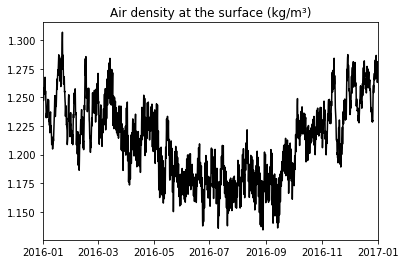

In [46]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['rho'],c='black')
plt.title('Air density at the surface (kg/m³)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.show()

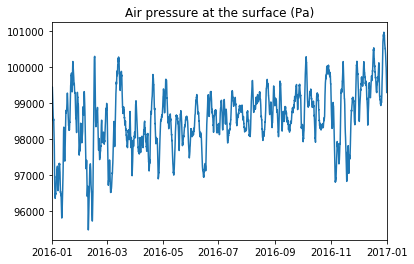

In [47]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['p'],c='black')
plt.title('Air pressure at the surface (Pa)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))
plt.show()

In [48]:
# merge production_wind_solar and weather_by_day DataFrames
combined = pd.merge(production_wind_solar, weather_by_day, how='left', left_index=True, right_index=True)


In [49]:
# drop redundant 'T (C)' column
combined = combined.drop('T (C)', axis=1)
combined.head()


,DE_solar_generation_actual,DE_wind_generation_actual,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
utc_timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,8522.0,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.0,0.0,275.296747,1.253185,99281.007812
2016-01-01 00:15:00,0.0,8542.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 00:30:00,0.0,8619.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 00:45:00,0.0,8634.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 01:00:00,0.0,8567.0,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.0,0.0,275.255473,1.253778,99288.492188


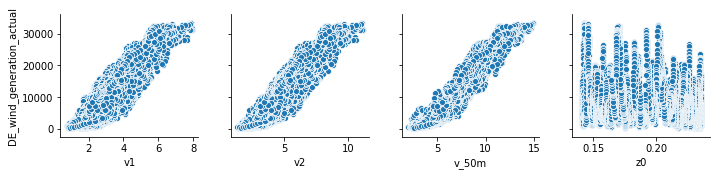

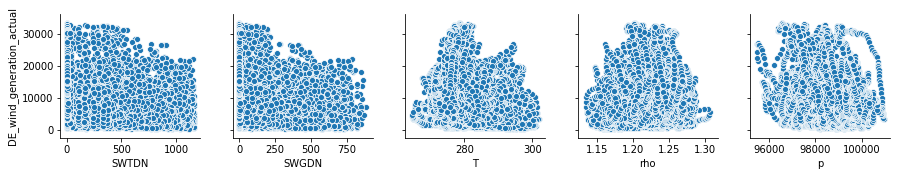

In [52]:
#for wind generation
sns.pairplot(combined, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['DE_wind_generation_actual'],)
sns.pairplot(combined, x_vars=['SWTDN', 'SWGDN', 'T', 'rho', 'p'], y_vars=['DE_wind_generation_actual'],)


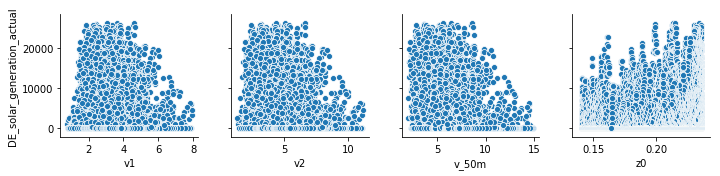

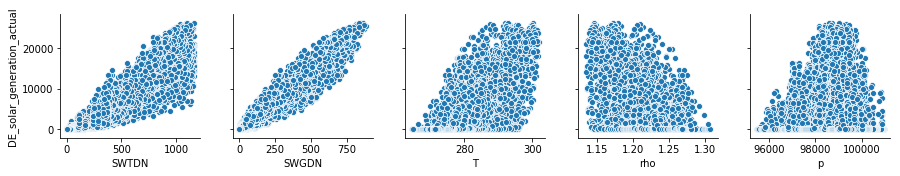

In [53]:
#for solar Generation
sns.pairplot(combined, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['DE_solar_generation_actual'])
sns.pairplot(combined, x_vars=['SWTDN', 'SWGDN', 'T', 'rho', 'p'], y_vars=['DE_solar_generation_actual'])


C:\Users\win10\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


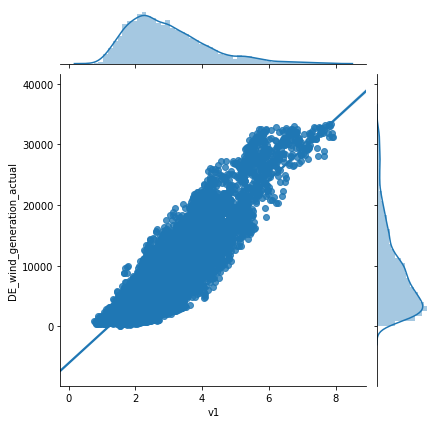

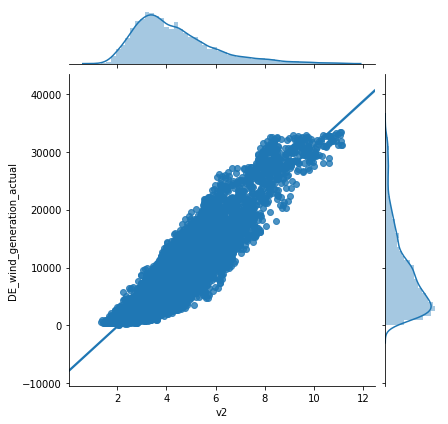

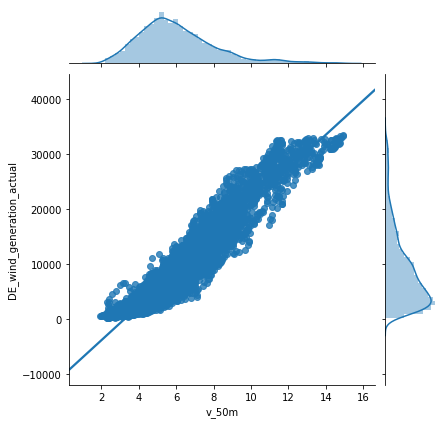

In [54]:
#for wind 
sns.jointplot(x='v1', y='DE_wind_generation_actual', data=combined, kind='reg')
sns.jointplot(x='v2', y='DE_wind_generation_actual', data=combined, kind='reg')
sns.jointplot(x='v_50m', y='DE_wind_generation_actual', data=combined, kind='reg')


C:\Users\win10\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


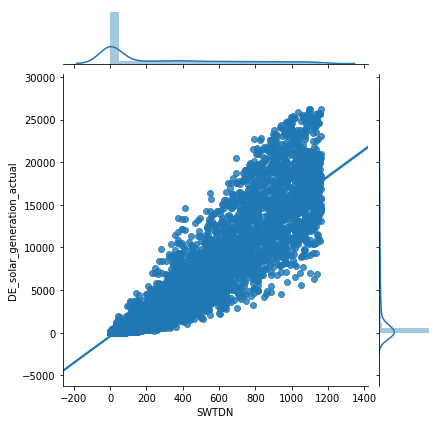

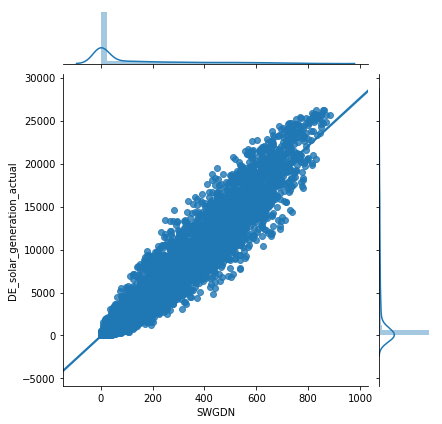

In [55]:
#for solar
sns.jointplot(x='SWTDN', y='DE_solar_generation_actual', data=combined, kind='reg')
sns.jointplot(x='SWGDN', y='DE_solar_generation_actual', data=combined, kind='reg')


In [3]:
# predicting
#predicting the solar generation
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
# Importing the dataset
dataset = pd.read_csv('weather_data_GER_2016.csv')

X = dataset.iloc[:, 12:14].values
y = dataset.iloc[:, 14].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

-88384.1063292319
[  330.60438057 77231.75063404]
Mean Squared Error: 278473.34155984496
Root Mean Squared Error: 527.7057338705398
r_2 Statistic : 0.97
[100584.43  93779.88 100219.55 ... 102225.81 101490.27  99067.07]
               Actual      Predicted
0       100584.431957  100829.914062
1        93779.875540   94501.015625
2       100219.549044  100140.398438
3       101168.181214  100820.507812
4       103294.096145  103022.882812
5        96234.922570   96641.484375
6        93221.050829   94579.242188
7        96497.789112   95809.421875
8        90765.436574   90796.164062
9        95407.409627   95815.984375
10       99885.224378   99114.203125
11       97229.126035   97153.406250
12       98143.070380   98284.460938
13       94837.407928   94980.562500
14       98513.706581   98331.890625
15       89525.049792   88175.351562
16      100226.836269  100384.828125
17       96710.727144   96466.828125
18       99825.458834   99831.546875
19      101903.095520  101533.859375
20  

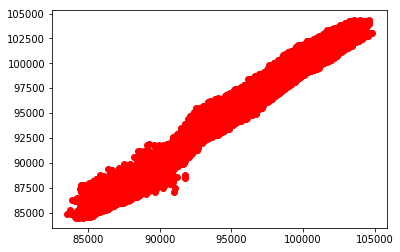

In [6]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)
Z = regressor.predict(X_test)
print(regressor.intercept_)
print(regressor.coef_)
print('Mean Squared Error:',mean_squared_error(Z,y_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Z,y_test)))
print('r_2 Statistic : %.2f' % r2_score(Z,y_test))
print(Z.round(2))



df = pd.DataFrame({'Actual': Z, 'Predicted': y_test})
print(df)
plt.scatter(Z,y_test,color='red')
#plt.plot(X_test,y_test,color='blue')
plt.show()



In [67]:
#predicting
#predicting the wind generation
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression



In [68]:
# from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [69]:
# Importing the dataset
dataset = pd.read_csv('weather_data_GER_2016.csv')

X = dataset.iloc[:, 4:7].values
y = dataset.iloc[:, 9].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0) 

In [70]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)
Z = regressor.predict(X_test)
print(regressor.intercept_)
print(regressor.coef_)
print('Mean Squared Error:',mean_squared_error(Z,y_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(Z,y_test)))
print('r_2 Statistic : %.2f' % r2_score(Z,y_test))

0.2683011262137813
[-0.57696649  0.61255702 -0.16537134]
Mean Squared Error: 0.11143995384967871
Root Mean Squared Error: 0.3338262330160389
r_2 Statistic : -1.24


          Actual  Predicted
0       0.127463   0.073003
1       0.451505   0.764165
2       0.318697   0.065526
3       0.258063   0.062139
4      -0.188042   0.007564
5       0.131204   0.055989
6       0.544631   0.653569
7       0.227795   0.040334
8       0.324006   0.511235
9       0.298020   0.183782
10      0.276762   0.048452
11      0.346844   0.290166
12      0.186959   0.072088
13      0.388489   0.908452
14      0.270585   0.068120
15      0.403071   1.011235
16      0.022543   0.047658
17      0.275182   0.066045
18      0.227977   0.042882
19      0.098847   0.015176
20      0.153880   0.054006
21      0.196461   0.104131
22      0.368135   0.348272
23     -0.236096   0.005203
24      0.301313   0.074163
25      0.266368   0.078527
26      0.232905   0.071752
27      0.226202   0.114782
28      0.334475   0.217901
29      0.016545   0.049001
...          ...        ...
449711  0.046624   0.036519
449712  0.071319   0.047460
449713  0.004791   0.034963
449714  0.202518   0

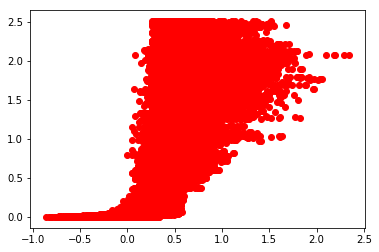

In [71]:
#print(Z.round(2))
#print (X_train)
#print(y_train)
#Z = Z.round(2)
#m=np.array([X_test])
#n=np.array([y_test])
#print(m.shape)
#print(n.shape)
df = pd.DataFrame({'Actual': Z, 'Predicted': y_test})
print(df)
plt.scatter(Z,y_test,color='red')
#plt.plot(X_test,y_test,color='blue')
plt.show()
